# Lecture 5 
- Statistical Independence
- Combinatorics
- Bayes' Theorem and Applications

These are some of the theorems and corollaries that we have learned so far:

* $\forall E\in\mathcal{F}, 0 \leq P(E)\leq 1$
* $P(\Omega)=1$ and $P(\emptyset) = 0 $
* $P(A^c) = P(\overline{A}) = 1 - P(A)$
* If $A\subset B$, then $P(A)\leq P(B)$
* **DeMorgan's Law 1**: $\overline{A\cap B} = \overline{A}\cup\overline{B}$  
* **DeMorgan's Law 2**: $\overline{A\cup B} = \overline{A}\cap\overline{B}$
* $P(A\cap B) = P(A) + P(B) - P(A\cup B)$
* If $A$ and $B$ are M.E. then $A\cap B=\emptyset \Rightarrow P(A\cap B) = 0$
* **Conditional Probability**: $P(A|B) = \frac{P(A\cap B)}{P(B)}$, for $P(B)>0$
* **Chain Rules**: $P(A\cap B) = P(A|B)P(B)$ and $P(A\cap B) = P(B|A)P(A)$
* **Multiplication Rule**: $P(\bigcap_{i=1}^n A_i) = P(A_1)P(A_2|A_1)P(A_3|A_1\cap A_2)\dots P\left(A_n|A_1\cap\dots \cap A_{n-1}\right)$
* **Total Probability**: if a set of events $\{C_i\}_{i=1}^n$ are partitions of the sample space $\Omega$, then $P(A) = \sum_{i=1}^n P(A|C_i)P(C_i)$

In [4]:
import random
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

### Review of the Law of Total Probability

**<font color=blue>Example 1:</font> A magician has two coins, one fair and one 2-headed coin. Consider the experiment where she picks one coin at random and flips it $i$ times. Let $H_i$ denote the event that the outcome of flip i is heads. Using the Total Probability Law, find the following:**

1. $P(H_1)$

\begin{align*}
P(H_1) &= P(H_1|F)P(F) + P(H_1|\overline{F})P(\overline{F})\\
&= \frac{1}{2}\times\frac{1}{2} + 1\times\frac{1}{2}\\
&=\frac{3}{4}
\end{align*}

# Statistical Independence

Suppose that a magician has **3 fair coins**, she chooses one at random and flips $i$ times. What is the probability $P(H_2|H_1)$?

Because she only has fair coins, whichever coin she chooses, the possible outcomes are H and T. So, knowing the result of the 1st flip **will not affect** the result of the 2nd flip, that is,

$$P(H_2|H_1) = P(H_2) = \frac{1}{2}$$

In general, for two events $A$ and $B$, when $P(A|B) = P(A)$, we say that $A$ is **statistically independent (s.i.)** of B, since the probabilities are not affected by knowledge of $B$ having occurred.

* By the chain rule, if $A$ is independent of B: $P(A\cap B) = P(A|B)P(B) = P(A)P(B)$.

Furthermore, if $P(A)>0$, $P(B)>0$, and $P(A|B)=P(A)$, then

\begin{align*}
P(B|A) &= \frac{P(A\cap B)}{P(A)}\\
&= \frac{P(A|B)P(B)}{P(A)}\\
&= \frac{P(A)P(B)}{P(A)}\\
&= P(B)
\end{align*}

<div class="alert alert-success">

So, if $A$ is statistically independent of $B$, then $B$ is statistically independent of $A$!
</div>

Thus, we can write $P(A\cap B) = P(A)P(B)$, and we use this for our definition of statistical independence because it works even when one of $P(A) = 0$ or $P(B) = 0$.

<div class="alert alert-info" role="alert">
  <strong>Statistical Independence</strong>
    
Events $A$ and $B$ are **statistically independent (s.i.)** if and only if (iff)
    
$$P(A\cap B) = P(A)P(B)$$
</div>

* Events that arise from completely separate random phenomena are statistically independent.

If $A$ and $B$ are s.i. events, then the following pairs of events are also s.i.:

* $A$ and $\overline{B}$

* $\overline{A}$ and $B$

* $\overline{A}$ and $\overline{B}$

(*I recommend you to prove these statements.*)

**<font color=blue>Example 2:</font> A fair six-sided die is rolled twice. What is the probability of observing a 1 or a 2 on the top face on either roll of the die?**

Let $E_i$ denote the event observing face $i$ on the top face on either roll.

\begin{align*}
P(E_1\cup E_2) &= P(E_1) + P(E_2) - P(E_1\cap E_2), E_1\text{ and }E_2\text{ are s.i.}\\
&= P(E_1) + P(E_2) - P(E_1)P(E_2)\\
&= \frac{2}{6}\times\frac{2}{6} - \frac{2}{6}\times\frac{2}{6}\\
&= \frac{5}{9}
\end{align*}

**<font color=blue>Example 2:</font> (Take 2) - A fair six-sided die is rolled twice. What is the probability of observing a 1 or a 2 on the top face on either roll of the die?**

\begin{align*}
P(E_1 \cup E_2) &= 1 - P(\overline{E_1\cup E_2}),\text{using DeMorgan's Law 2} \\
&= 1 - P(\overline{E_1}\cap \overline{E_2}),E_1\text{ and }E_2\text{ are s.i., then }\overline{E_1}\text{ and }\overline{E_2}\text{ are also s.i.}\\
&= 1 -P(\overline{E_1})P(\overline{E_2}) \\
&=1 - (1-P(E_1))(1-P(E_2))\\
&= 1 - \left(1-\frac{1}{3}\right)\left(1-\frac{1}{3}\right)\\
&= \frac{5}{9}
\end{align*}

## Conditionally Independent Events: Statistical Independence and Conditional Probability

We noted earlier that the conditional probabilities of events, conditioned on a particular event form a legitimate probability law. We can thus talk about independence of various events with respect to this conditional law. 

In particular, given an event $C$, the events $A$ and $B$ are called **<font color=orange>conditionally independent</font>** if

$$P(A\cap B|C) = P(A|C)P(B|C)$$

**<font color=blue>Example 3:</font> A magician has two coins coins, one fair and one 2-headed coin. Consider the experiment where she picks one coin at random and flips it $i$ times. Let $H_i$ denote the event that the outcome of flip i is heads. Using the Total Probability Law, find the following:**

1. $P(H_1\cap H_2)$

\begin{align*}
P(H_1\cap H_2) &= P(H_1\cap H_2|F)P(F) + P(H_1\cap H_2|\overline{F}), H_1\text{ and }H_2\text{ are conditionally s.i. in both cases}\\
&= P(H_1|F)P(H_2|F)P(F) + P(H_1|\overline{F})P(H_2|\overline{F})P(\overline{F})\\
&= \frac{1}{2}\times\frac{1}{2}\times\frac{1}{2} + 1\times 1\times\frac{1}{2}\\
&= \frac{5}{8}
\end{align*}

2. Are $H_1$ and $H_2$ s.i.?

\begin{align*}
P(H_1) &= P(H_2) = \frac{3}{4}\\
P(H_1)P(H_2) &= \frac{3}{4}\times\frac{3}{4} \neq \frac{5}{8} = P(H_1 \cap H_2)
\end{align*}

No! They are not s.i.

3. $P(H_1\cap H_2\cap H_3)$

\begin{align*}
P(H_1\cap H_2\cap H_3) &= P(H_1\cap H_2\cap H_3|F)P(F) + P(H_1\cap H_2\cap H_3|\overline{F})P(\overline{F})\\
&= \left(\frac{1}{2}\right)^3\times\frac{1}{2} + (1)^3\times\frac{1}{2}\\
&= \frac{9}{16}
\end{align*}

4. $P(H_3|H_1\cap H_2)$

\begin{align*}
P(H_3|H_1\cap H_2) &= \frac{P(H_1\cap H_2\cap H_3)}{P(H_1\cap H_2)}\\
&= \frac{9/16}{5/8}\\
&= \frac{9}{10}
\end{align*}

5. Implement a simulation to solve $P(H_3|H_1\cap H_2)$.

In [11]:
def probH3givenH12(num_sims=100_000):
    heads12_count=0
    heads123_count=0
    coins =['fair','2-headed'] # pocket of coins
    for sim in range(num_sims): # for each simulation
        coin = random.choice(coins) # select a coin at random
        if coin=='fair': # if fair coin selected
            S=[1,0] # define its sample space (1-Heads, 0-Tails)
        else:           # if 2-headed coin selected
            S=[1,1] #define its sample space  (1-Heads, 0-Tails)
        values=random.choices(S, k=3) # flip the selected coin 3 times
        if (np.sum(values[:2]))==2: # if the first two flips are Heads
            heads12_count+=1
            if values[2]==1: #if the last flip is also Heads
                heads123_count+=1
                
    print('Probability of obs. Heads in the 3rd flip \
    given Heads in the 1st flip and 2nd flip is ', heads123_count/heads12_count)

In [12]:
probH3givenH12()

Probability of obs. Heads in the 3rd flip     given Heads in the 1st flip and 2nd flip is  0.9014721631687473


**<font color=blue>Example 4:</font> Monty Hall Problem**

***Slightly paraphrased from the Ask Marilyn column of Parade magazine:* Suppose you're on a game show, and you're given
the choice of three doors:**

* **behind one door is a car**
* **behind the other doors are goats**

**You pick a door, and the host, who knows what's behind the doors, opens another door, which he knows has a goat. The host then offers you the option to switch doors. Does it matter if you switch?**

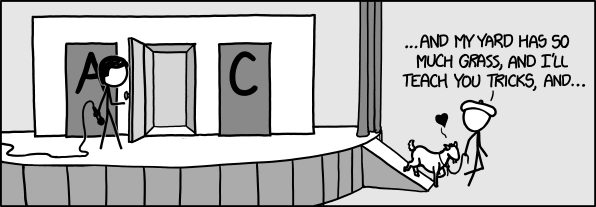

In [1]:
from IPython.display import Image
Image('https://imgs.xkcd.com/comics/monty_hall.png',width=700)

**Let's compute the probabilities of winning for the following three strategies:**

1. **Never switch**

Let $W_i$ be the event winning on choice $i$.

\begin{align*}
P(W_2) = P(W_1) = \frac{1}{3} = \frac{\text{1 car}}{\text{3 doors}}
\end{align*}

2. **Always switch**

Note that: $$P(W_2 | W_1) = 0$$

So $P(W_2|\overline{W_1}) = 1$. Then:

\begin{align*}
P(W_2) &= P(W_2|W_1)P(W_1) + P(W_2|\overline{W_1})P(\overline{W_1})\\
&= 0\times\frac{1}{3} + 1\times\frac{2}{3}\\
&= \frac{2}{3}
\end{align*}

3. **Flip a fair coin, and switch if it comes up heads.**

Let $H$ be the event coin flips heads.

\begin{align*}
P(W_2) &= P(W_2|H)P(H) + P(W_2|\overline{H})P(\overline{H})\\
&=\frac{2}{3}\times\frac{1}{2} + \frac{1}{3}\times\frac{1}{2}\\
&= \frac{1}{2}
\end{align*}

___

# Combinatorics

In many of the examples I have presented in class, I have provided you with a numerical probability value, but these quantities are computed based on relative frequencies.

* **Counting** events is in principle straightforward, but it is frequently challenging.

* The art of counting constitutes a large portion of the field of **combinatorics**.

<div class="alert alert-info">
  
**Combinatorics** is the mathematics of counting. It can be used to find probabilities involving combinations of fair experiments.
</div>

<div class="alert alert-info">
    
A **combined experiment** is one in which the outcome is a tuple that takes one outcome from each of a sequence of subexperiments.
</div>

## Cartesian Product

<div class="alert alert-info">
    <b>Cartesian Product</b>
    
The **cartesian product** of two sets $A$ and $B$ is denoted $A \times B$ and is defined by 

$$ A \times B = \{ (a,b) | a \in A \mbox{ and } b \in B\}$$

That is, it is the set of all two-tuples with the first element from set $A$ and the second element from set $B$.
</div>

**<font color=blue>Example 8:</font> Consider the experiment where we first flip a fair coin and then roll a fair 6-sided die.**

In [1]:
import itertools

In [2]:
A = ['H','T']
B = list(range(1,7))

In [3]:
AtimesB = list(itertools.product(A,B))
AtimesB

[('H', 1),
 ('H', 2),
 ('H', 3),
 ('H', 4),
 ('H', 5),
 ('H', 6),
 ('T', 1),
 ('T', 2),
 ('T', 3),
 ('T', 4),
 ('T', 5),
 ('T', 6)]

## The Principle of Counting

Consider a combined experiment that consists of $r$ stages. Suppose that:
1. There are $n_1$ possible results at the first stage
2. For every possible result at first stage, there are $n_2$ possible results at the second stage
3. More generally, for any sequence of possible results at the first $i-1$ stages, there are $n_i$ possible results at the $i$th stage. Then, the total number of possible results of the $r$-stage process is $n_1\times n_2\times\dots\times n_r$

In the previous example, we have $2\times 6 = 12$ outcomes.

## 1. Sampling with Replacement and with Ordering

**<font color=blue>Example 9:</font> Consider the combined experiment of flipping a fair coin 20 times.**

In [ ]:
A = ['H','T']
Coinflips = list(itertools.product(A,repeat=20))
Coinflips

In [5]:
len(Coinflips)

1048576

In [6]:
2**20

1048576

How can we determine the **observed relative frequencies** *analytically* for this combined experiment? Let's put together what we know so far:

1. The experiment of flipping a fair coin is a fair experiment with 2 outcomes:
$$S= \{H,T\}$$
Let $P(H)$ and $P(T)$ denote the probability of getting heads and tails, respectively. Then
$$P(H)=P(T)= \frac{1}{|S|}=\frac 1 2$$
2. The combined experiment of flipping a fair coin 20 times has the sample space 
$$S_C=\{H,T\} \times \{H,T\} \times \ldots \times \{H,T\}~~~~\mbox{(Cartesian product of 20 sets)}$$


* An outcome of this combined experiment is a sequence of 20 heads and tails values; for instance, $(H,T,T,H,H,H,T,H,T,H,H,T,T,T,T,H,H,T,H,H)~$ is an outcome of the combined experiment.

This is an example of **Sampling with Replacement and with Ordering**. We are choosing 20 ordered values from the set $\{H,T\}$, and after we choose a value, that value still remains in the set.

Each outcome is a 20-tuple, and each element of the 20-tuple may take 1 of 2 values. Thus, the number of outcomes is

\begin{align*}
\left|S_C\right| &= 2 \times 2 \times \cdots \times 2\text{ (multiplied 20 times)}\\
& = 2^{20}\\
& = 1,048,576
\end{align*}

<div class="alert alert-info">
    <b>Sampling with replacement and with ordering</b>
    
Consider choosing $k$ values from a set of $n$ values. The result is a $k$-tuple: $(x_1, x_2, \ldots, x_k)$, 
where $x_i \in A, \forall i=1,2,\ldots, k$. 

Thus, this is a combined experiment with $|S_1|=|S_2|=\ldots=|S_k|=|A|\equiv n$.\\

Therefore the number of distinct ordered $k$-tuple outcomes is $n^k$.
</div>

## 2. Sampling without Replacement and with Ordering

**<font color=blue>Example 10:</font> Consider the combined experiment of flipping a fair coin 20 times and counting the number of heads.**

Let $H_i$ be the event that $i$ heads occur on 20 flips of a fair coin.

* Thus, there are 20 outcomes in the event $H_1$. Since this is a fair experiment,

$$P(H_1) = \frac{20}{1048576} \approx 2 \times 10^{-5}$$

* There are also 20 outcomes for the event "number of Tails = 1", which is the same as $H_{19}$, so 

$$ P(H_{19}) = \frac{20}{1048576} \approx 2 \times 10^{-5}$$

* It is also easy to see that there is 1 outcome for the event $H_0$ and 1 outcome for the event $H_{20}$, so

$$P(H_0) = P(H_{20}) = \frac{1}{1048576} \approx 1 \times 10^{-6}$$

* Consider the problem of counting the number of outcomes in the event $H_2$:
    * An outcome in $H_2$ looks like $(T,T,T,T,T,T,T,H,T,T,T,T,T,T,H,T,T,T,T,T)$
Note that we can express this in compressed notation by just recording where the 2 Heads are: (7,14)

So, determining the number of ways there are to have 2 heads out of 20 is  the same as determining the number of ways there are to specify a 2-tuple  $(h_1,h_2)$ such that:
* $h_i \in \{0,1,\ldots 19\}$

* $h_1 \ne h_2$

* How many ways are there to choose $(h_1,h_2)$ according to the restrictions above?

<div class="alert alert-info">
    <b>Sampling without replacement and with ordering ($k$-permutations)</b>
    
In general, the number of ways to choose $k$ items from $n$ items **without replacement** and **with ordering** is
$$ n \times (n-1) \times \ldots \times (n-k+1) = \frac{n!}{(n-k)!}$$
</div>

Here, with ordering means that outcomes like $(7,14)$ and $(14,7)$ are both allowed and considered distinct.

**<font color=blue>Example 1:</font> Consider the combined experiment of flipping a fair coin 20 times and counting the number of heads. How many ways are there to observe a count of 2 heads in 20 coin flips?**

**PYTHON technique** To compute the factorial of an integer in Python, you can use the ```scipy``` library:

In [2]:
from scipy.special import factorial

In [3]:
print(factorial(20)/factorial(20-2))

380.0


In [5]:
print('Probability of H2 = ', 380/(2**20))

Probability of H2 =  0.000362396240234375


Note that in counting the number of ways that 2 Heads can occur in 20 flips, (7,14) represents the same thing as (14,7). 

So, if we determine the number of **ordered** ways to choose 2 unique values out of 20, we have **overcounted** by a factor of 2.

Thus, the correct number of outcomes in $H_2$ is
$$ \left|H_2 \right| = \frac{20 \cdot 19}{2} = 190 $$ 

Now, let's try to count $|H_3|$. We know the number of ways to choose 3 **ordered** values from 20 without replacement is
$$\frac{20!}{(20-3)!} = 20 \cdot 19 \cdot 18$$

But how many repeats are there if we want to know the number of unordered sets? Let's consider how many ways we can arrange (1,2,3):

(1,2,3)
(1,3,2)
(2,1,3)
(2,3,1)
(3,1,2)
(3,2,1)

So, there are 6.

Note that the number of ways to order 3 things is the same as the number of order ways to choose 3 items from a set of 3.

<div class="alert alert-info">
    <b>Permutations</b>
    
The number of *permutations* of $k$ objects is the number of orderings of those $k$ objects, and can be calculated as
$$ k \times (k-1) \times (k-2) \times \ldots \times 2 \times 1 \\ = k! $$
</div>

## 3. Sampling without Replacement and without Ordering

Finally, we are ready to determine $|H_3|$, which is $20 \times 19 \times 18$ divided by the number of orderings of 3 items, which is $3!=6$, so

\begin{align*}
\left|H_3\right| &= \frac{20!}{(20-3)!}\frac{1}{3!} \\
&=\frac{20 \times 19 \times 18}{6} \\
&= 1140
\end{align*}

Moreover, the formula for general $H_k$ follows directly.

<div class="alert alert-info">
    <b>Sampling without Replacement and without Ordering (Combinations)</b>
    
The number of ways to choose $k$ items from a set of $n$ items **without replacement** and **without ordering** is
$$  \frac{n!}{(n-k)!k!} $$

The value of the equation can also be expressed as
$$ \binom{n}{k} = C^{n}_{k} $$
and is know as the **binomial coefficient**.
</div>

**PYTHON technique** To determine $\binom{n}{k}$ in Python, you can also use the ```scipy``` library:

In [6]:
from scipy.special import binom

In [7]:
print(binom(20,2), 20*19/2)

190.0 190.0


In [8]:
print(binom(20,3), 20*19*18/6)

1140.0 1140.0


Thus, the probability of any event $H_k \subset \Omega$ is 

$$ P(H_k) = \frac{|H_k|}{|\Omega|} = \frac{\binom{20}{k}}{2^{20}}$$

Let's put it all together and compare with our simulation:

In [15]:
# Simulation parameters
num_sims=100
flips=20 # flips of fair coin

# Conducting experiment
results=npr.randint(2, size=(num_sims, flips)) # this will be an array of size num_sims-by-flips
num_heads = np.sum(results, axis=1) # sums the "1"s along the columns (number of flips)

# Analytical Probability
analytic=[]
for k in range(flips+1):
    analytic+=[binom(flips,k)/(2**flips)]

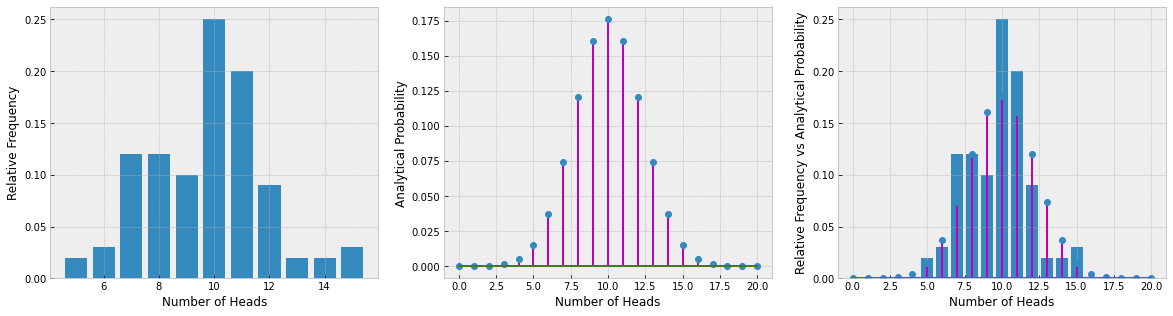

No. Heads | Relative Freq. | Analytic Probability
5 	 0.02 	 9.5367431640625e-07
6 	 0.03 	 1.9073486328125e-05
7 	 0.12 	 0.0001811981201171875
8 	 0.12 	 0.001087188720703125
9 	 0.1 	 0.004620552062988281
10 	 0.25 	 0.0147857666015625
11 	 0.2 	 0.03696441650390625
12 	 0.09 	 0.0739288330078125
13 	 0.02 	 0.12013435363769531
14 	 0.02 	 0.16017913818359375
15 	 0.03 	 0.17619705200195312


In [16]:
fig = plt.figure(figsize=(20,5))

# Counting - Observed Relative Frequencies
vals, counts = np.unique(num_heads, return_counts=True)
plt.subplot(1,3,1)
plt.bar(vals, counts/num_sims)
plt.xlabel('Number of Heads')
plt.ylabel('Relative Frequency')


# Analytical probability
plt.subplot(1,3,2)
plt.stem(range(flips+1), analytic, 'm')
plt.xlabel('Number of Heads')
plt.ylabel('Analytical Probability')


# Relative Frequencies vs Analytical Probability
plt.subplot(1,3,3)
plt.bar(vals, counts/num_sims)
plt.stem(range(flips+1), analytic, 'm')
plt.xlabel('Number of Heads')
plt.ylabel('Relative Frequency vs Analytical Probability')
plt.show() # forces the plot to be displayed at this stage

print("No. Heads | Relative Freq. | Analytic Probability")
for i in range(len(vals)):
    print(vals[i], '\t', counts[i]/num_sims,'\t',analytic[i])

## 4. Sampling with Replacement and without Ordering

Suppose that we want to sample from the set $A=\{a_1,a_2,\dots,a_n\}$ $k$ times such that repetition is allowed and ordering does not matter. For example, if $A=\{1,2,3,4,5,6\}$ is the sample space of rolling a 6-sided fair die and $k=2$, then there are 21 differet ways of doing this

\begin{equation*}
\{(1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (2,2), (2,3), (2,4), (2,5), (2,6), (3,3), (3,4), (3,5), (3,6), (4,4), (4,5), (4,6), (5,5), (5,6), (6,6)\}
\end{equation*}

* How can we get the number 21 without actually listing all the possibilities? 

One way to think about this is to note that any of the pairs in the above list can be represented by the number of 1's, 2's, 3's, 4's, 5's and 6's it contains. That is, if $x_i$ is the number of face $i$, we can equivalently represent each pair by a vector $(x_1,x_2,x_3,x_4,x_5,x_6)$, for example,

\begin{align*}
(1,5) &\rightarrow (x_1,x_2,x_3,x_4,x_5,x_6) = (1,0,0,0,1,0)\\
(2,2) &\rightarrow (x_1,x_2,x_3,x_4,x_5,x_6) = (0,2,0,0,0,0)\\
(3,4) &\rightarrow (x_1,x_2,x_3,x_4,x_5,x_6) = (0,0,1,1,0,0)\\
(5,5) &\rightarrow (x_1,x_2,x_3,x_4,x_5,x_6) = (0,0,0,0,2,0)
\end{align*}

Note that here $x_i \geq 0$ are integers and $x_1+x_2+x_3+x_4+x_5+x_6 = k = 2$. Thus, we can claim that the number of ways we can sample two elements from the set $A=\{1,2,3,4,5,6\}$ such that ordering does not matter and repetition is allowed is the same as solutions to the following equation

$$x_1+x_2+x_3+x_4+x_5+x_6 = 2\text{, where } x_i\in\{0,1,2\}$$

This is an interesting observation and in fact using the same argument we can make the following statement for general $k$ and $n$.

<div class="alert alert-info">
    <b>Sampling with Replacement and without Ordering (Partitions)</b>
    
The number of $k$-multisets of an $n$-set $A=\{a_1,a_2,\cdots,a_n\}$ **with replacement** and **without ordering** are binomial coefficients of the form:

$$\binom{n + k - 1}{k} = \binom{k + n - 1}{n-1}$$
</div>

**Bonus Material:** https://www.youtube.com/watch?v=UTCScjoPymA

**<font color=blue>Example 2:</font> What is the probability of a roll of 11 when rolling fair 6-sided dice twice?**

In [17]:
binom(6+2-1,2), binom(2+6-1,6-1)

(21.0, 21.0)

In [2]:
print('Probability of a roll of 11 when rolling a 6-sided die twice is ', 2/36)
# This is corrected. 

Probability of a roll of 11 when rolling a 6-sided die twice is  0.05555555555555555


# The Bayes' Theorem (sometimes called Bayes' Rule)

Consider two events $A$ and $B$, by the **chain rule** equations we know that: 

$$P(A\cap B) = P(A|B)P(B)$$
and
$$P(B\cap A) = P(B|A) P(A)$$

Note that 

\begin{align*}
P(A\cap B) &= P(B\cap A)\\
\iff P(A|B)P(B) &= P(B|A) P(A)\\
\iff P(A|B) &= \frac{P(B|A) P(A)}{P(B)}
\end{align*}

<div class="alert alert-info" role="alert">
  <strong>Bayes's Theorem</strong>
    
If the set of events $\{A_i\}_{i=1}^n$ partitions the sample space $\Omega$, and assuming $P(A_i)>0$, for all $i$. Then, for any event $B$ such that $P(B)>0$, we have

\begin{align*}
P(A_i|B) &= \frac{P(B|A_i)P(A_i)}{P(B)}
\end{align*}

where $P(B)$ can be computed using the Law of Total Probability,
  
\begin{align*}
P(B) &= P(B|A_1)P(A_1) + \cdots +P(B|A_n)P(A_n)
\end{align*}

</div>

* **Add that to the set of formulas!**

**<font color=blue>Example 5:</font> Consider the experiment where we select between a fair 6-sided die and a fair 12-sided die at random and flip it once. What is the probability that the die selected was the 12-sided die if face on top was a 5?**

<!-- Let $S$ be the event that the fair 6-sided die was selected, $T$ the event that the fair 12-sided die was selected, and $D_i$ the event that the face $i$ was rolled.

$$P(T|D_5) = \frac{P(T\cap D_5)}{P(D_5)} = \frac{P(D_5|T)P(T)}{P(D_5)}$$

and

$$P(D_5) = P(D_5|S)P(S) + P(D_5|T)P(T) = \frac{1}{6}\times\frac{1}{2} + \frac{1}{12}\times\frac{1}{2} = 0.125$$

Putting it together,

$$P(T|D_5) = \frac{P(D_5|T)P(T)}{P(D_5|S)P(S) + P(D_5|T)P(T)} = \frac{\frac{1}{12}\times\frac{1}{2}}{\frac{1}{6}\times\frac{1}{2} + \frac{1}{12}\times\frac{1}{2}}=\frac{1}{3}$$ -->

In [10]:
num_sims=100_000
dice = ['6-sided','12-sided']
face5_count = 0
die12_count = 0
for sim in range(num_sims):
    coin = random.choice(dice) # choose die at random
    if coin=='6-sided':
        S=list(range(1,7))
    else:
        S=list(range(1,13))
    flip = random.choice(S) # roll the die
    if flip==5: 
        face5_count+=1
        if coin == '12-sided':
            die12_count+=1
print('Probability that die is 12-sided if observed result is 5 is ',
      die12_count/face5_count)

Probability that die is 12-sided if observed result is 5 is  0.3355907895785196


* Bayes's rule is an extremely useful theorem and is often used for **statistical inference**.

There are a number of *causes* that may result in a certain *effect*. We observe the effect, and we wish to infer the cause.

* The events $A_1, A_2,\dots,A_n$ can be characterized as a set of possible causes, and
* The event $B$ represents the effect

The probability $P(B|A_i)$ computes the probability that the effect $B$ will be observed when the cause $A_i$ is present. This amounts to a probabilistic model for a cause-effect relationship.

Given that the effect $B$ has occurred, we want to evaluate the probability $P(B|A_i)$ that the cause $A_i$ is present.

* We refer to $P(A_i|B)$ as the **<font color=green>posterior probability</font>** of event $A_i$ given the information

* We refer to $P(A_i)$ as the **<font color=orange>prior probability</font>**

* We refer to $P(B|A_i)$ as the **<font color=blue>likelihood</font>**

* We refer to $P(B)$ as the **<font color=brown>evidence/effect probability</font>**

**<font color=blue>Example 2:</font> A test for a certain rare disease is assumed to be correct 95% of the time: if a person has the disease, the test results are positive with probability 0.95, and if the person does not have the disease, the test results are negative with probability 0.95. A random person drawn from a certain *population* has probability 0.001 of having the disease. Given that the person just tested positive, what is the probability that the person has the disease?**

<!-- Let $A$ be the event that the person has the disease, $B$ the event that the test results are positive. We are given that $P(B|A) = 0.95$ and $P(A) = 0.001$. We want to compute $P(A|B)$.

\begin{align*}
P(A|B) &= \frac{P(B|A)P(A)}{P(B)}\\
&= \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\overline{A})P(\overline{A})}\\
&= \frac{0.95 \times 0.001}{0.95\times 0.001 + 0.05\times 0.999}\\
&\approx 0.0187
\end{align*} -->

# Bayesian Statistics vs Classic Statistics

The Bayes' theorem is an *extremely* useful result, formulated by Thomas Bayes in the 18th century and later published by Richard Price.

This result originated the term **Bayesian statistics** or **Bayesian inference**, giving a different interpretation of probability when compared to **classic statistics** or **Frequentist inference**.

* **Frequentist statistics**: refers to the field of statistics that draws conclusions from data by computing relative frequency of events in the data.

* **Bayesian statistics**: refers to the field of statistics that draws conclusions from data by testing out the hypothesis and computing their observed probability from data.

In **inference**, Bayes' rule makes use of a **prior** which is an assumption made about some underlying phenomenon. Bayes' equation makes use of this prior probability to compute the probability of such cause given some observational data.

Whereas in classical inference, no assumption are made about the underlying nature of the system that generated the observational data. It's inference is purely based on how the frequency of outcomes.

![ThomasBayes](https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif)
Thomas Bayes (1701-1761), [Wikipedia page](https://en.wikipedia.org/wiki/Thomas_Bayes)

**Which statistical approach should I use to draw conclusions from my data?** We will see that it *depends* on
1. the problem
2. the actual quantity (and quality) of the observational data that you have
3. whether or not you have prior beliefs
4. other factors

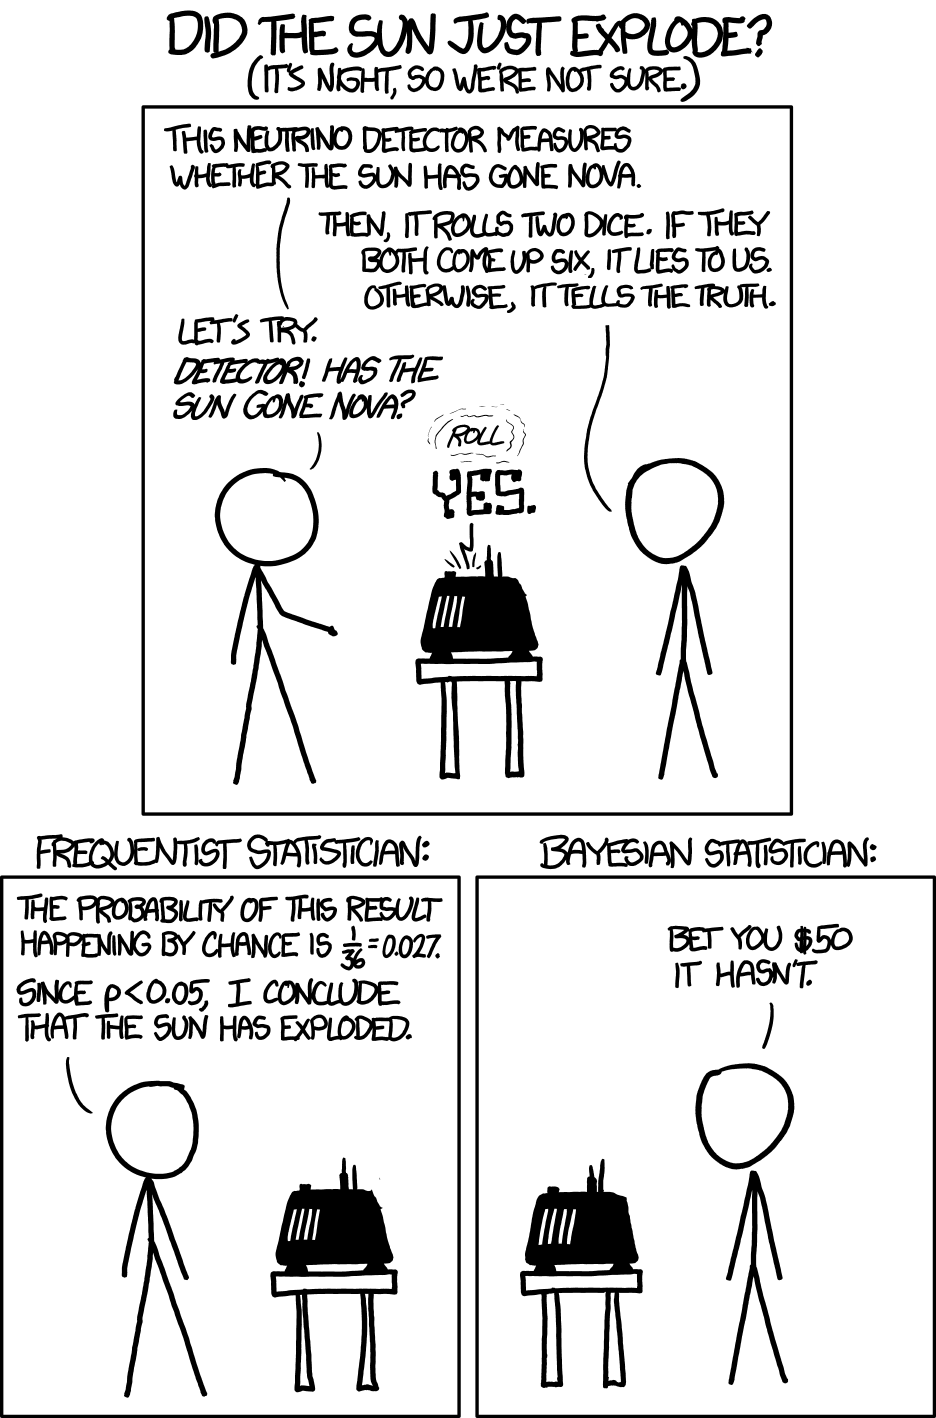

In [2]:
from IPython.display import Image
Image('https://imgs.xkcd.com/comics/frequentists_vs_bayesians_2x.png',width=500)

**<font color=blue>Example 7:</font> Suppose that I flipped a coin 5 times and observe the event $E=\{H,H,H,H,H\}$. Without telling you anything else, what is the probability of heads? What would your answer be?**

The **hidden state** of this problem is: what coin was used for this experiment?

* Frequentist statistics: $P(H) = \frac{|H|}{|E|} = \frac{5}{5} = 1$. 

It does not use any prior beliefs.

* Bayesian statistics: you start by assuming that chances are e.g. I'm flipping a fair coin - this is your prior belief, that the coin is fair, then $P(H|\text{fair})=\frac{1}{2}$, furthermore you also compute a probability for that hypothesis:

\begin{align*}
P(\text{fair}| E) &= \frac{P(E|\text{fair})P(\text{fair})}{P(E)}\\
&= \frac{P(E|\text{fair})P(\text{fair})}{P(E|\text{fair})P(\text{fair})+P(E|\text{unfair})P(\text{unfair})}\\
&= \frac{\left(\frac{1}{2}\right)^5\times\frac{1}{2}}{\left(\frac{1}{2}\right)^5\times\frac{1}{2}+(1)^5\times\frac{1}{2}}, \text{ assuming you believe it to be 50/50 between fair and 2-headed}\\
&\approx 0.0303
\end{align*}

If you thought I had 2 fair coin and 1 2-headed, then the probability for fair coin is $\frac{2}{3}$ and probability for 2-headed was $\frac{1}{3}$. With this, the probability of the hypothesis/cause "coin is fair" is:

$$P(\text{fair}| E) = \frac{\left(\frac{1}{2}\right)^5\times\frac{2}{3}}{\left(\frac{1}{2}\right)^5\times\frac{2}{3}+(1)^5\times\frac{1}{3}} \approx 0.0588$$

Note that a **stronger (prior) belief** influenced the probability of your **hypothesis**.

**This is where the (healthy) "rivalry" between Frequentist vs Bayesian emerges:**

* Frequentists say that we should never make assumptions (prior beliefs) because they will change the probability of the hypothesis. Frequestists support that the use of the observational data is the approach to take conclusions. Frequentist approach to probability is **data-driven**.

* Bayesians say that in situations where we do not have enough data, it is prudent to make assumptions as the conclusions will become more "realistic".

There are strategies to adjust the prior belief (correct its value to a *better* value) as we continue to collect more observations. We will study this.

## Applications of Bayesian Inference

Applications of Bayesian inference are endless. These are some examples:

1. Decision theory, e.g. communication system (example next lecture)

2. Bioinformatics and healthcare, e.g. building a risk model from genetic profiles

3. Recommender systems, e.g. Netflix

4. Stock market prediction

5. Email spam filter

6. Financing, e.g. banks are using Bayesian inference to determine interest rates of a loan by using a risk model

8. many, many others...